# Ao3 Tags on "Fix-it Fics" as an Indicator of Satisfying Endings #

Are there common themes among fix it fics that show what audiences crave that shows lack? To answer this, I will scrape data from Archive of Our Own (Ao3) to compare tags used on “fix it” fanfictions, or fanfictions that aim to give the show a “better” ending, across the shows Voltron, Supernatural, and Star Wars: The Sequel Trilogy. The answer to this question could be used to suggest what themes audiences are wanting to see in media in general and could be used as a recommendation to media writers on how to create “satisfying” endings. 


## Data Collection ##

To do this, I will use the following packages.

In [54]:
import pandas as pd
from bs4 import BeautifulSoup as bs
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

I request data from Ao3 using the requests library. I did some work on Ao3's actual page as it would be easier than generate the url, which I was unsure how to do. There is not a lot of documentation on how Ao3 works, as seen by the lack of API, so all urls will be generated on the actual Ao3 site and then pasted over.



### Playing with the Data ###

I wanted to see how to scrape Ao3, so I used Voltron as a test. I obtained the website url to scrape from by doing a manual search on Ao3's website. Ao3 lists 20 fanfics per page, so this will have 20 fanfics worth of tags. Tags are not limited, so this is entirely dependent on what the author decided to list when publishing the fic. I also decided to exclude any explicit labeled fanfictions for the sake of this being a school project and having to present this data. This works out for the overall mission as well, as all of the fandoms I chose are aired on TV and follow FCC guidelines on how graphic their content can be for TV-14/PG-13.

In [55]:
page = requests.request("GET", 'https://archiveofourown.org/tags/Voltron:%20Legendary%20Defender/works?commit=Sort+and+Filter&exclude_work_search%5Brating_ids%5D%5B%5D=13&page=1&utf8=%E2%9C%93&work_search%5Bcomplete%5D=&work_search%5Bcrossover%5D=&work_search%5Bdate_from%5D=&work_search%5Bdate_to%5D=&work_search%5Bexcluded_tag_names%5D=&work_search%5Blanguage_id%5D=&work_search%5Bother_tag_names%5D=Fix-It&work_search%5Bquery%5D=&work_search%5Bsort_column%5D=revised_at&work_search%5Bwords_from%5D=&work_search%5Bwords_to%5D=')

In [56]:
page

<Response [200]>

In [57]:
soup = bs(page.text, "html.parser")

I looked through the soup in order to find what html tags contained the "tag" items that I will need for my analysis. In this case, it is in linked items (<a/href>) with the class "tag".

In [58]:
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<script>window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"232243a405","applicationID":"129290979","transactionName":"cVtXEUpbWFxdQhkUXEBfSkpRWlBVQA==","queueTime":0,"applicationTime":222,"agent":""}</script>
<script>(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"232243a405",applicationID:"129290979"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<n.length;i++)r(n[i]);return r}({1:[function(t,e,n){function r(){}function i(t,e,n,r){return function(){return s.recordSupportability("API/"+e+"/called"),o(t+e,[u.now()]

In [59]:
tags = soup.find_all('a', class_='tag')

With this, I can clean up the list so it just contains what is inside the tags.

In [60]:
tags

[<a class="tag" href="/tags/Voltron:%20Legendary%20Defender">Voltron: Legendary Defender</a>,
 <a class="tag" href="/tags/Voltron:%20Legendary%20Defender/works">Voltron: Legendary Defender</a>,
 <a class="tag" href="/tags/No%20Archive%20Warnings%20Apply/works">No Archive Warnings Apply</a>,
 <a class="tag" href="/tags/Keith*s*Lance%20(Voltron)/works">Keith/Lance (Voltron)</a>,
 <a class="tag" href="/tags/Lotor*s*Allura%20(Voltron)/works">Lotor/Allura (Voltron)</a>,
 <a class="tag" href="/tags/Keith%20*a*%20Shiro%20(Voltron)/works">Keith &amp; Shiro (Voltron)</a>,
 <a class="tag" href="/tags/Keith%20*a*%20Pidge%20(Voltron)/works">Keith &amp; Pidge (Voltron)</a>,
 <a class="tag" href="/tags/Keith%20*a*%20James%20(Voltron)/works">Keith &amp; James (Voltron)</a>,
 <a class="tag" href="/tags/Keith%20*a*%20Allura%20(Voltron)/works">Keith &amp; Allura (Voltron)</a>,
 <a class="tag" href="/tags/Keith%20(Voltron)/works">Keith (Voltron)</a>,
 <a class="tag" href="/tags/Krolia%20(Voltron)/works">

In [61]:
tagList = [x.text for x in soup.find_all('a', class_='tag')]

In [62]:
tagList

['Voltron: Legendary Defender',
 'Voltron: Legendary Defender',
 'No Archive Warnings Apply',
 'Keith/Lance (Voltron)',
 'Lotor/Allura (Voltron)',
 'Keith & Shiro (Voltron)',
 'Keith & Pidge (Voltron)',
 'Keith & James (Voltron)',
 'Keith & Allura (Voltron)',
 'Keith (Voltron)',
 'Krolia (Voltron)',
 'Romelle (Voltron)',
 'Lotor (Voltron)',
 'Lance (Voltron)',
 'Allura (Voltron)',
 'Shiro (Voltron)',
 'Pidge | Katie Holt',
 'Hunk (Voltron)',
 'Kolivan (Voltron)',
 'Kosmo (Voltron)',
 'Haggar (Voltron)',
 'James (Voltron)',
 'Established Relationship',
 'Getting Together',
 'Quantum Abyss (Voltron)',
 'Altean Alchemy (Voltron',
 'Angst',
 'Angst and Hurt/Comfort',
 'Hurt/Comfort',
 'Stranded',
 'Fix-It',
 'Keith (Voltron) is Bad at Feelings',
 'Lance (Voltron) Needs a Hug',
 'Miscommunication',
 'dumbasses to lovers',
 'Music',
 'Found Family',
 'Trauma',
 'they are all working through it',
 'Keith (Voltron)-centric',
 "the other paladins are there and featured but it's mainly klance so

And with that, I have a list of tags for the first 20 fix-it fanfics from Voltron in Ao3. 


### Function Creation ###
Now that I have learned how to scrape the tags from Ao3, I will create a function that can take the fandom name, a data frame, and how many pages to iterate through as parameters and spit out a data frame of tags for that fandom. The function can be used as long as you use the exact phrase used for the fandom as Ao3 does. If it is your first time using the function, use an empty data frame. In order to keep appending onto that data frame, feed that same data frame into the function when using a different fandom title. The function will a dataframe with two columns: one with the tags and the other with the name of the fandom that tag came from.

The first part of the function is where the showName is changed so the spaces are replaced with "%20", as that is how the url reads spaces. The function updates the showName and then iterates through each page requested, scraping tags from each page. It then goes back through to add the final column of the "Fandom" is came from.

In [63]:
def getTags(showName, df, getPages):
    pageNum = 1
    x = 0
    showNameParse = showName.split()
    showNameAddSpace = ""
    for word in showNameParse:
        showNameAddSpace = showNameAddSpace + showNameParse[x] + "%20"
        x += 1
    #print(showNameAddSpace)
    temp_df = pd.DataFrame()
    while pageNum < getPages:
        page = requests.request("GET", "https://archiveofourown.org/tags/" + showNameAddSpace + "/works?commit=Sort+and+Filter&exclude_work_search%5Brating_ids%5D%5B%5D=13&page=" + str(pageNum) + "&utf8=%E2%9C%93&work_search%5Bcomplete%5D=&work_search%5Bcrossover%5D=&work_search%5Bdate_from%5D=&work_search%5Bdate_to%5D=&work_search%5Bexcluded_tag_names%5D=&work_search%5Blanguage_id%5D=&work_search%5Bother_tag_names%5D=Fix-It&work_search%5Bquery%5D=&work_search%5Bsort_column%5D=revised_at&work_search%5Bwords_from%5D=&work_search%5Bwords_to%5D=")
        soup = bs(page.text, "html.parser")
        tagList = [x.text for x in soup.find_all('a', class_='tag')]
        temp_df = temp_df.append(tagList, ignore_index=True)
        pageNum += 1
        for x in temp_df:
            temp_df["Fandom"] = showName
    df = df.append(temp_df, ignore_index=True)
    return df

### Voltron ###

I chose Voltron for this project due to its notoriety of having a disliked ending by the fans. I will use my function to obtain the tags from the first 5 pages. 5 is a somewhat arbitrary number. This will gather tags for the first 100 fanfictions.

In [64]:
tag_df = pd.DataFrame()
final_tagList = getTags("Voltron: Legendary Defender", tag_df, 5)

In [65]:
final_tagList.head(30)

,0,Fandom
0,Voltron: Legendary Defender,Voltron: Legendary Defender
1,Voltron: Legendary Defender,Voltron: Legendary Defender
2,No Archive Warnings Apply,Voltron: Legendary Defender
3,Keith/Lance (Voltron),Voltron: Legendary Defender
4,Lotor/Allura (Voltron),Voltron: Legendary Defender
...,...,...
25,Altean Alchemy (Voltron,Voltron: Legendary Defender
26,Angst,Voltron: Legendary Defender
27,Angst and Hurt/Comfort,Voltron: Legendary Defender
28,Hurt/Comfort,Voltron: Legendary Defender


### Supernatural ###

Now that I have 40 fanfics worth of tags for Voltron, I will repeat this process for the tv show Supernatural, chosen for its popularity as the subject of fanfiction (over 240,000 fics!) and for its bad ending. 

Since I have already worked out what tags I need and how I can get them from this site, I will be condensing my process to fewer cells with less explanation.

In [66]:
final_tagList = getTags("Supernatural", final_tagList, 5)

In [67]:
final_tagList

,0,Fandom
0,Voltron: Legendary Defender,Voltron: Legendary Defender
1,Voltron: Legendary Defender,Voltron: Legendary Defender
2,No Archive Warnings Apply,Voltron: Legendary Defender
3,Keith/Lance (Voltron),Voltron: Legendary Defender
4,Lotor/Allura (Voltron),Voltron: Legendary Defender
...,...,...
5236,If Supernatural (TV) Were on HBO,Supernatural
5237,Actually more like a Netflix Original but what...,Supernatural
5238,Pre-Series Dean Winchester,Supernatural
5239,Season/Series 01,Supernatural


### Star Wars: The Sequel Trilogy ###

This fandom is different than the previous two chosen as it is much bigger than Voltron or even Supernatural since it encompasses many different movies and tv shows. When I chose Star Wars, I did so because I personally did not like the ending to Star Wars Episode IX Rise of Skywalker. I did a preliminary check and found fix-it fanfics for that movie. However, when choosing which fandom website to sort and scrape, I found that there were 11 categories for the Star Wars media franchise. Rather than look through all of the media, which was a category, I chose to stay true to what made me pick Star Wars in general and chose the "Star Wars: The Sequel Trilogy" fandom since it includes Rise of Skywalker.

Despite this being a movie trilogy rather than a tv show, I do not expect this media difference to affect tag usage and preferences among fix-it fanfics. 

Since I have already worked out what tags I need and how I can get them from this site, I will be condensing my process to fewer cells with less explanation.

In [68]:
final_tagList = getTags("Star Wars Sequel Trilogy", final_tagList, 5)

In [69]:
final_tagList

,0,Fandom
0,Voltron: Legendary Defender,Voltron: Legendary Defender
1,Voltron: Legendary Defender,Voltron: Legendary Defender
2,No Archive Warnings Apply,Voltron: Legendary Defender
3,Keith/Lance (Voltron),Voltron: Legendary Defender
4,Lotor/Allura (Voltron),Voltron: Legendary Defender
...,...,...
7784,Post-Star Wars: The Rise of Skywalker,Star Wars Sequel Trilogy
7785,Star Wars: The Rise of Skywalker Fix-It,Star Wars Sequel Trilogy
7786,Ben Solo Lives,Star Wars Sequel Trilogy
7787,Happy Ending,Star Wars Sequel Trilogy


## Data Organization ##

In [70]:
final_tagList.duplicated()

0       False
1        True
2       False
3       False
4       False
        ...  
7784     True
7785     True
7786     True
7787     True
7788     True
Length: 7789, dtype: bool

In [71]:
final_tagList["Count"] = 1

In [72]:
def findDuplicates(df):
    x = 0
    i = 0
    while x < 7752:
        while i < 7752:
            if df[0][x] == df[0][i+1]:
                print("found match:", x)
                df.at[x, "Count"] = final_tagList["Count"][x] + 1
                #df.drop(x)
            i += 1
        x += 1
    return df
        
    

In [73]:
test_df = findDuplicates(final_tagList)

found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found match: 0
found matc

In [74]:
test_df

,0,Fandom,Count
0,Voltron: Legendary Defender,Voltron: Legendary Defender,84
1,Voltron: Legendary Defender,Voltron: Legendary Defender,1
2,No Archive Warnings Apply,Voltron: Legendary Defender,1
3,Keith/Lance (Voltron),Voltron: Legendary Defender,1
4,Lotor/Allura (Voltron),Voltron: Legendary Defender,1
...,...,...,...
7784,Post-Star Wars: The Rise of Skywalker,Star Wars Sequel Trilogy,1
7785,Star Wars: The Rise of Skywalker Fix-It,Star Wars Sequel Trilogy,1
7786,Ben Solo Lives,Star Wars Sequel Trilogy,1
7787,Happy Ending,Star Wars Sequel Trilogy,1


In [75]:
def showMultTags(df):
    x = 0
    new_df = pd.DataFrame()
    while x < len(df) - 1:
        if df["Count"][x] > 1:
            new_df = df.append(df["Count"][x])
        x+=1
    return new_df
        
    

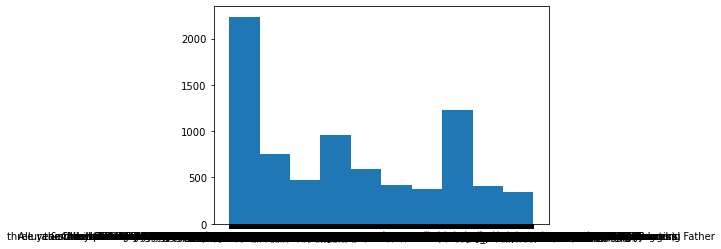

In [76]:
fig1, ax1 = plt.subplots(1, 1,)
ax1.hist(test_df[0])
plt.show()

Hmm, this graph seems pretty nonsensical. Or at least, I have no idea what it is plotting. Let's find another way.

In [77]:
test_df.loc[test_df["Count"] > 1]

,0,Fandom,Count
0,Voltron: Legendary Defender,Voltron: Legendary Defender,84


I want to be able to find all the tags that are repeated and give them a count of how many times they appear. I will then be able to analyze the frequency of certain tags and make a claim about what kinds of themes are most popular in fix-it fics. However, creating this count has been an issue so far. I know that .duplicated exists for data frames, where it returns a list of boolean values. I will try and use this to find duplicated tags and affect the count. I tried to create a function that added a count, but it only adds a count if the tags happen to be right next to each other. 

In [78]:
final_tagList["Duplicates"] = final_tagList.duplicated()

In [79]:
final_tagList

,0,Fandom,Count,Duplicates
0,Voltron: Legendary Defender,Voltron: Legendary Defender,84,False
1,Voltron: Legendary Defender,Voltron: Legendary Defender,1,False
2,No Archive Warnings Apply,Voltron: Legendary Defender,1,False
3,Keith/Lance (Voltron),Voltron: Legendary Defender,1,False
4,Lotor/Allura (Voltron),Voltron: Legendary Defender,1,False
...,...,...,...,...
7784,Post-Star Wars: The Rise of Skywalker,Star Wars Sequel Trilogy,1,True
7785,Star Wars: The Rise of Skywalker Fix-It,Star Wars Sequel Trilogy,1,True
7786,Ben Solo Lives,Star Wars Sequel Trilogy,1,True
7787,Happy Ending,Star Wars Sequel Trilogy,1,True


In [80]:
final_tagList.loc[final_tagList["Duplicates"] == True]

,0,Fandom,Count,Duplicates
42,Voltron: Legendary Defender,Voltron: Legendary Defender,1,True
48,Keith & Shiro (Voltron),Voltron: Legendary Defender,1,True
56,Shiro (Voltron),Voltron: Legendary Defender,1,True
58,Hunk (Voltron),Voltron: Legendary Defender,1,True
59,Lance (Voltron),Voltron: Legendary Defender,1,True
...,...,...,...,...
7784,Post-Star Wars: The Rise of Skywalker,Star Wars Sequel Trilogy,1,True
7785,Star Wars: The Rise of Skywalker Fix-It,Star Wars Sequel Trilogy,1,True
7786,Ben Solo Lives,Star Wars Sequel Trilogy,1,True
7787,Happy Ending,Star Wars Sequel Trilogy,1,True


In [81]:
final_tagList.pivot_table(columns=[0], aggfunc ='size')

0
#DeanStudies                                                       1
#ReleaseTheRianJohnsonCut                                          1
(Very) gradual Finn/Poe                                            1
(briefly) - Freeform                                               1
(but not in the sexy way)                                          1
                                                                  ..
yell about your feelings its healthy                               1
yes I know it's 2021 but I don't care this ship still slaps        1
you can get the google chrome add on to put in your name though    1
you're the reader                                                  1
zethrid                                                            1
Length: 3389, dtype: int64

In [82]:
final_tag_dups = final_tagList.pivot_table(columns=[0, 'Fandom'], aggfunc ='size')

In [83]:
final_tag_dups

0                                                                Fandom                     
#DeanStudies                                                     Supernatural                   1
#ReleaseTheRianJohnsonCut                                        Star Wars Sequel Trilogy       1
(Very) gradual Finn/Poe                                          Star Wars Sequel Trilogy       1
(briefly) - Freeform                                             Star Wars Sequel Trilogy       1
(but not in the sexy way)                                        Star Wars Sequel Trilogy       1
                                                                                               ..
yell about your feelings its healthy                             Voltron: Legendary Defender    1
yes I know it's 2021 but I don't care this ship still slaps      Voltron: Legendary Defender    1
you can get the google chrome add on to put in your name though  Supernatural                   1
you're the reader        

In [84]:
pd.set_option("display.max_rows", 10)

In [85]:
final_tag_dups

0                                                                Fandom                     
#DeanStudies                                                     Supernatural                   1
#ReleaseTheRianJohnsonCut                                        Star Wars Sequel Trilogy       1
(Very) gradual Finn/Poe                                          Star Wars Sequel Trilogy       1
(briefly) - Freeform                                             Star Wars Sequel Trilogy       1
(but not in the sexy way)                                        Star Wars Sequel Trilogy       1
                                                                                               ..
yell about your feelings its healthy                             Voltron: Legendary Defender    1
yes I know it's 2021 but I don't care this ship still slaps      Voltron: Legendary Defender    1
you can get the google chrome add on to put in your name though  Supernatural                   1
you're the reader        

<AxesSubplot:ylabel='0,Fandom'>

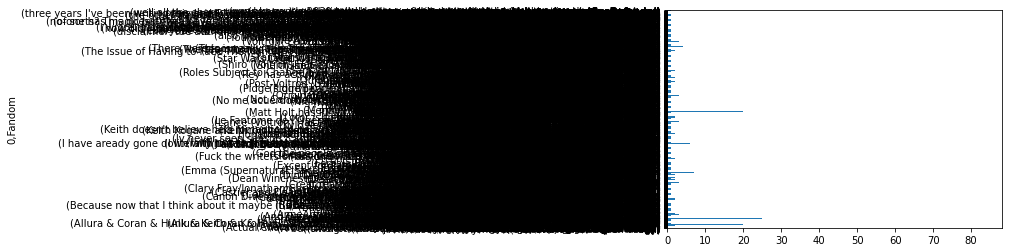

In [86]:
final_tag_dups.plot.barh()

In [87]:
np.round(final_tagList.pivot_table(columns=[0], aggfunc = [stats.mode]))

mode                                     \
0                    #DeanStudies          #ReleaseTheRianJohnsonCut   
Count                  ([1], [1])                         ([1], [1])   
Duplicates         ([False], [1])                     ([False], [1])   
Fandom      ([Supernatural], [1])  ([Star Wars Sequel Trilogy], [1])   

                                               \
0                     (Very) gradual Finn/Poe   
Count                              ([1], [1])   
Duplicates                     ([False], [1])   
Fandom      ([Star Wars Sequel Trilogy], [1])   

                                               \
0                        (briefly) - Freeform   
Count                              ([1], [1])   
Duplicates                     ([False], [1])   
Fandom      ([Star Wars Sequel Trilogy], [1])   

                                                                      \
0                   (but not in the sexy way)             (otra vez)   
Count                              ([1], [1])             ([1], [1])   
Duplicates                     ([False], [1])         ([False], [1])   
Fandom      ([Star Wars Sequel Trilogy], [1])  ([Supernatural], [1])   

                                                  \
0                 (there is eventual sex though)   
Count                                 ([1], [1])   
Duplicates                        ([False], [1])   
Fandom      ([Voltron: Legendary Defender], [1])   

                                                                              \
0          (though not as prevalent as the first fic)             10 Plagues   
Count                                      ([1], [1])             ([1], [1])   
Duplicates                             ([False], [1])         ([False], [1])   
Fandom           ([Voltron: Legendary Defender], [1])  ([Supernatural], [1])   

                                   ...                           \
0                      15x20 coda  ... will there be sex? Maybe   
Count                  ([1], [1])  ...               ([1], [1])   
Duplicates         ([False], [1])  ...           ([False], [1])   
Fandom      ([Supernatural], [1])  ...    ([Supernatural], [1])   

                                                                              \
0                 will they kiss I have no clue- with very slight deviations   
Count                                 ([1], [1])                  ([1], [1])   
Duplicates                        ([False], [1])              ([False], [1])   
Fandom      ([Voltron: Legendary Defender], [1])       ([Supernatural], [1])   

                                                                          \
0          wow it has its own tag - nice one guys         yeah seriously   
Count                                  ([1], [1])             ([1], [1])   
Duplicates                         ([False], [1])         ([False], [1])   
Fandom       ([Voltron: Legendary Defender], [1])  ([Supernatural], [1])   

                                                  \
0           yell about your feelings its healthy   
Count                                 ([1], [1])   
Duplicates                        ([False], [1])   
Fandom      ([Voltron: Legendary Defender], [1])   

                                                                        \
0          yes I know it's 2021 but I don't care this ship still slaps   
Count                                              ([1], [1])            
Duplicates                                     ([False], [1])            
Fandom                   ([Voltron: Legendary Defender], [1])            

                                                                            \
0          you can get the google chrome add on to put in your name though   
Count                                              ([1], [1])                
Duplicates                                     ([False], [1])                
Fandom                                  ([Supernatural], [1])                

            

So, I was able to find an easy way to get the duplicates without iterating by making a pivot table, which we did cover in class but I had forgotten about! The next step is to filter out all of the tags that are below 10 or 20 duplicates so I can actually read the graph that currently looks like the void. I am not sure the best way to do this. Perhaps I can create a new data frame based on filtering the pivot table? I will have to play around with it some more.